In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_extractor, find_bb, draw_bb, linear_fn, curved

image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Brown/image (6).JPG'
image2_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Brown/image (7).JPG'

ModuleNotFoundError: No module named 'scipy'

In [111]:
image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
im_shape = np.shape(image)
# print(im_shape)

lut = init_lut(fn=linear_fn)
lut2 = init_lut(fn=curved)
plt.plot(lut);
plt.show()

In [117]:

image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = hsv_filter(image_hsv)
(x,y,w,h) = find_bb(image_hsv)
croped_img = image_rgb[y:y+h,x:x+w]
image_rgb_bb = draw_bb(image_rgb, (x,y,w,h))
#convexhull

image2 = apply_lut(image_hsv, channel=2, LUT=lut)
image2 = cv2.cvtColor(image2, cv2.COLOR_HSV2BGR)


image_rgb2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image_hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
image_hsv2 = hsv_filter(image_hsv2)
(x,y,w,h) = find_bb(image_hsv2)
croped_img2 = image_rgb2[y:y+h,x:x+w]
image_rgb_bb2 = draw_bb(image_rgb2, (x,y,w,h))


(384, 208)


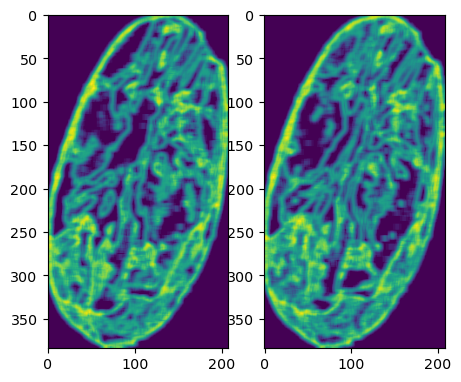

In [118]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 102.46 
gray_img  = cv2.cvtColor(croped_img, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(croped_img2, cv2.COLOR_BGR2GRAY)
glcm_image  = fast_glcm_entropy(gray_img, ks=7, distance=3, angle=0)
glcm_image2 = fast_glcm_entropy(gray_img2, ks=7, distance=3, angle=0)

print(np.shape(glcm_image))
#plot
plt.subplot(1,2,1)
plt.imshow(glcm_image)
plt.subplot(1,2,2)
plt.imshow(glcm_image2)
plt.show()

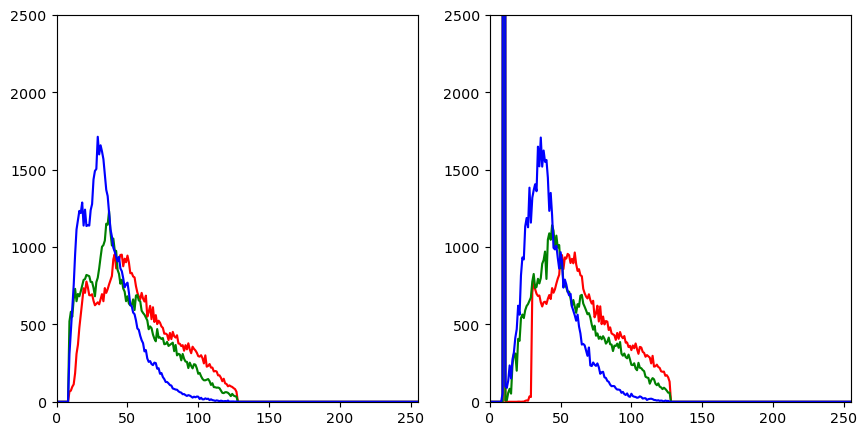

In [119]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
histogram = histogram_analysis(croped_img, plot=True)
plt.subplot(1,2,2)
histogram2 = histogram_analysis(croped_img2, plot=True)

In [120]:
a=statistic_extractor(croped_img)
b=statistic_extractor(croped_img2)
print(a)
print(b)



[[42.96216446314103 35.72469701522436 26.54892828525641]
 [35.44706895781429 31.331881046571244 22.033434229850265]
 [0.48882792158074856 0.6656640151219566 0.6410164523807357]
 [-0.535205123195889 -0.26206230807990627 0.19342923342897578]]
[[52.08796574519231 43.57167718349359 32.97996794871795]
 [36.210486173007645 31.4252321656001 21.327277136556155]
 [0.4632168331293883 0.7193454091184868 0.8057751276417541]
 [-0.6109441511115095 -0.2280834684996358 0.4715369079557945]]


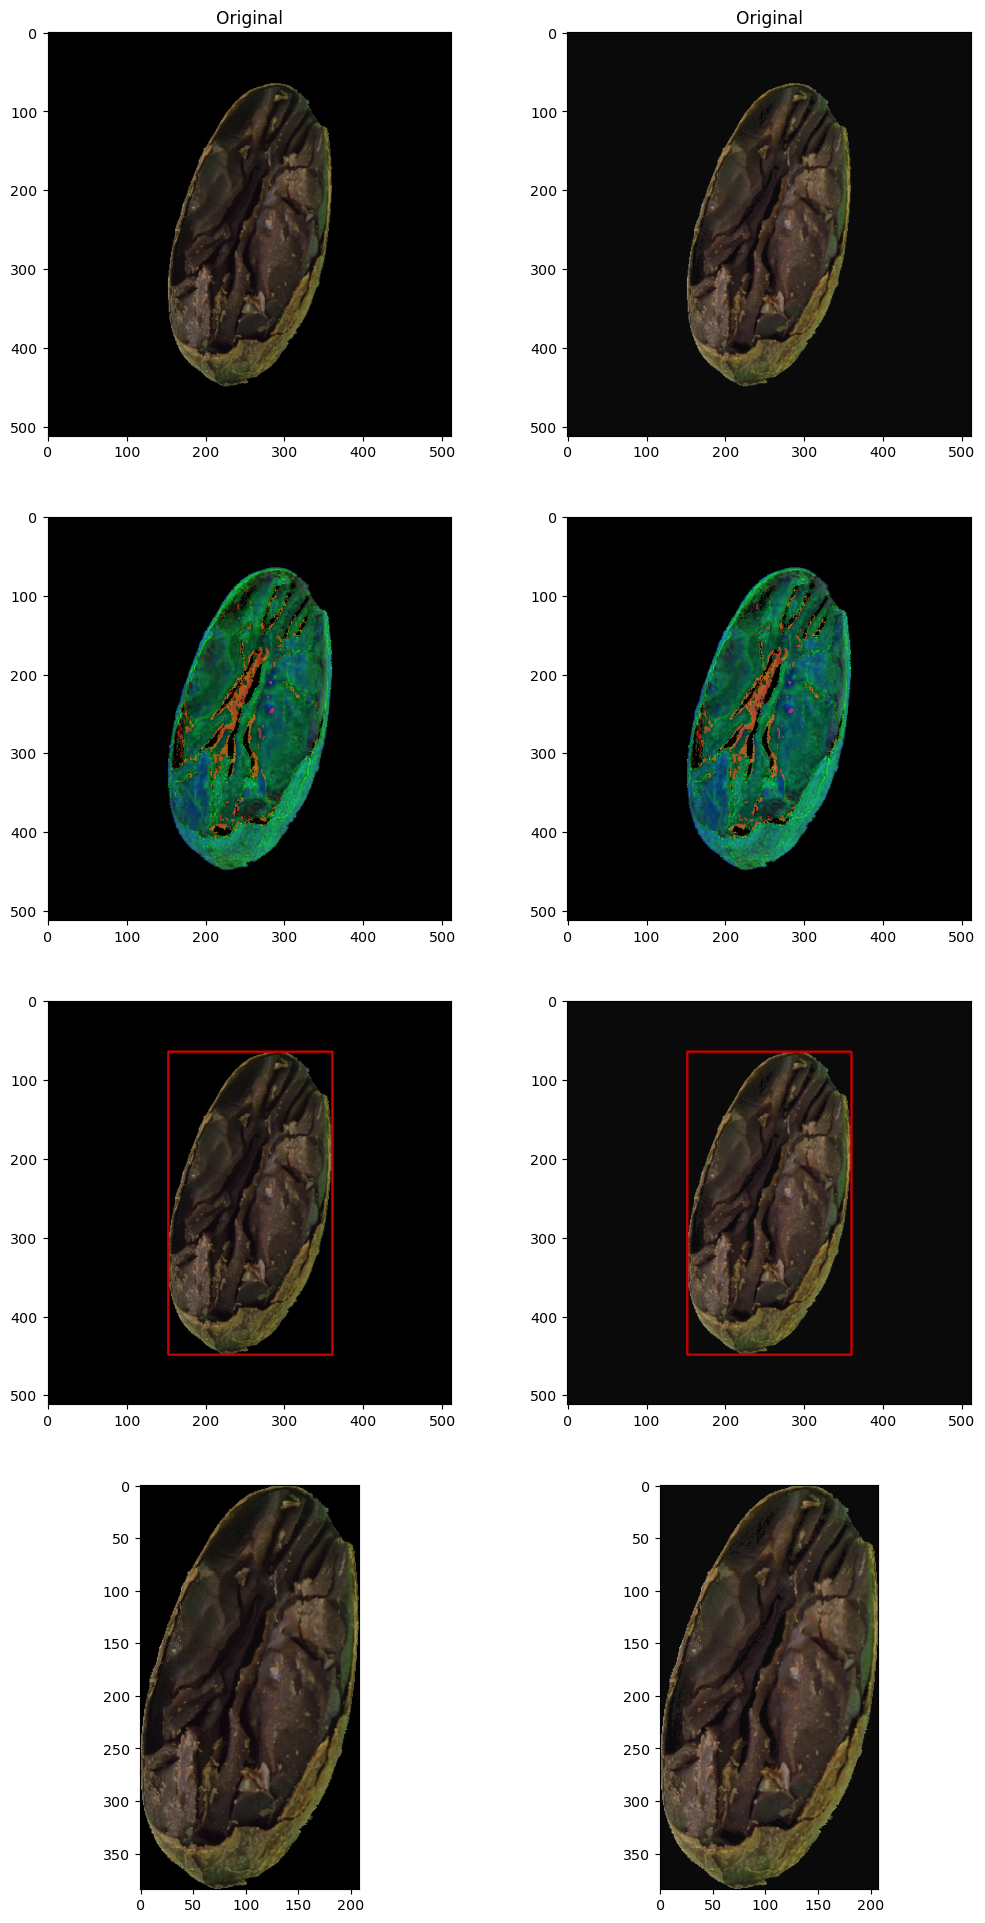

In [121]:
plt.rcParams["figure.figsize"] = (12,24)
plt.subplot(4,2,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.subplot(4,2,3)
plt.imshow(image_hsv)
plt.subplot(4,2,5)
plt.imshow(image_rgb_bb)
plt.subplot(4,2,7)
plt.imshow(croped_img)

plt.subplot(4,2,2)
plt.title("Original")
plt.imshow(image_rgb2)
plt.subplot(4,2,4)
plt.imshow(image_hsv2)
plt.subplot(4,2,6)
plt.imshow(image_rgb_bb2)
plt.subplot(4,2,8)
plt.imshow(croped_img2)

plt.show()